In [24]:
#Acquiring the data from the fasion MNIST data set

In [25]:
from tensorflow.python.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [26]:
print(x_train.shape, y_train.shape)
print(x_test.shape, x_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000, 28, 28)


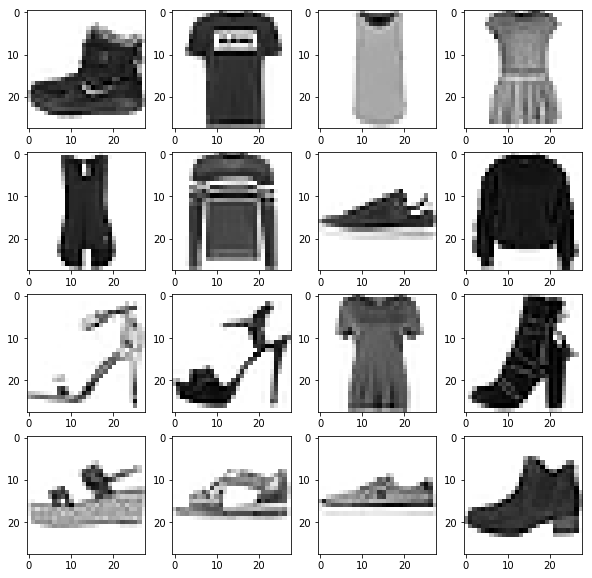

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i], cmap = 'binary')
plt.show()

In [28]:
#Processing the Data

In [29]:
#Start by transformation our 10 categories in to a so-called "one-hot encoded" vector.
#Basically, the category value of every example is turned into a 10-dimensional vector representing its category.

In [30]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(y_train[0])

(60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [31]:
#Next, we "unroll" the 28x28 pixel images into a 728 vector to make it easier to feed to the model.
#Also, the data sets are normalized.

In [32]:
import numpy as np
x_train = np.reshape(x_train, (60000, 28 * 28))
x_test = np.reshape(x_test, (10000, 28 * 28))

x_train = x_train / 255.
x_test = x_test / 255.

In [33]:
#Here, we build our model.  We compare between a model with regularization and dropout regularization.

In [34]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.regularizers import l2

nodes = 64

def create_model(weight_reg = False, dropout_reg = False):
    model = Sequential()
    if weight_reg:
        model.add(Dense(nodes, activation = 'relu',
                       input_shape = (784,), kernel_regularizer = l2(0.001)))
        model.add(Dense(nodes, activation = 'relu', kernel_regularizer = l2(0.001)))
    else:
        model.add(Dense(nodes, activation = 'relu', input_shape = (784,)))
        model.add(Dense(nodes, activation = 'relu'))
    if dropout_reg:
        model.add(Dropout(0.2))
    model.add(Dense(10, activation = 'softmax'))
    model.compile(
        loss = 'categorical_crossentropy',
        optimizer = 'adam',
        metrics = ['accuracy']
    )
    model.summary()
    return model

In [35]:
#Short function to show the results of the fit for the training and validation data

In [51]:
def show_acc(h, E):
    plt.plot(range(E), h.history['accuracy'], label = 'Training')
    plt.plot(range(E), h.history['val_accuracy'], label = 'Validation')
    plt.ylim([0.7, 1.0])
    plt.legend()
    plt.show()
    return

In [52]:
#First, a short function to simplify the log output.  Next, we run the experiment with the 'create_model' function
#we defined, train the model on the data set, give it the validation data set, and show the results using 'show_acc'

In [53]:
from tensorflow.python.keras.callbacks import LambdaCallback

simple_log = LambdaCallback(
    on_epoch_end = lambda e, l: print(e, end = '.')
)

def run_experiment(E = 20, weight_reg = False, dropout_reg = False):
    m = create_model(weight_reg, dropout_reg)
    h = m.fit(
        x_train, y_train, 
        epochs = E, verbose = False,
        validation_data = (x_test, y_test),
        callbacks = [simple_log]
    )
    show_acc(h, E)
    return

In [54]:
#Now, we just execute 'run_experiment' with no regularization first

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

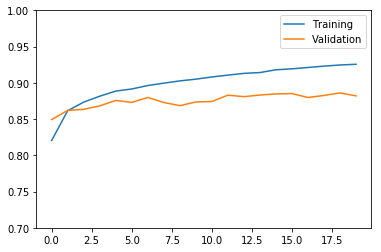

In [55]:
run_experiment()

In [45]:
#Finally, we execute "run_experiment" with weight regularization and dropout regularization

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

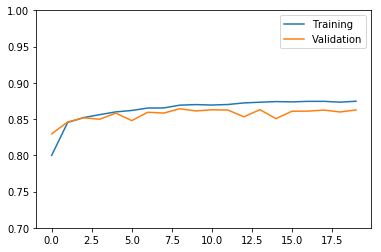

In [56]:
run_experiment(weight_reg = True, dropout_reg = True)